# Glob

In [3]:
import glob
glob.glob("/home/magnus/work-src/rna-tools/*py")

['/home/magnus/work-src/rna-tools/__init__.py',
 '/home/magnus/work-src/rna-tools/test.py',
 '/home/magnus/work-src/rna-tools/setup.py']

In [4]:
for f in glob.glob("/home/magnus/work-src/rna-tools/*py"):
    print (f)

/home/magnus/work-src/rna-tools/__init__.py
/home/magnus/work-src/rna-tools/test.py
/home/magnus/work-src/rna-tools/setup.py


# Execute a commend

In [5]:
def exe(cmd):
    import subprocess
    o = subprocess.Popen(
        cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    out = o.stdout.read().strip().decode()
    err = o.stderr.read().strip().decode()
    return out, err

In [6]:
cmd = "ls /home/magnus/work-src/rna-tools/*py"
out, err = exe(cmd)
for f in out.split('\n'):
    print f

/home/magnus/work-src/rna-tools/__init__.py
/home/magnus/work-src/rna-tools/setup.py
/home/magnus/work-src/rna-tools/test.py


# Pandas: make a data from scratch

In [11]:
cmd = "ls /home/magnus/work-src/rna-tools/*py"
out, err = exe(cmd)

    
import pandas as pd
df = pd.DataFrame()

for index, f in enumerate(out.split('\n')):
    out, err = exe('wc -l %s' % f)
    nol = out.split()[0]
    df = df.append(pd.DataFrame({'fn' : f, '# of lines' : int(nol)}, index=[index]))
    
df

,# of lines,fn
0,0,/home/magnus/work-src/rna-tools/__init__.py
1,27,/home/magnus/work-src/rna-tools/setup.py
2,13,/home/magnus/work-src/rna-tools/test.py


# Plotting

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot, transforms
%matplotlib inline
plt.style.use('classic')
plt.rcParams['figure.facecolor']='white'
import seaborn as sns
sns.set_style("whitegrid");
plt.rcParams['axes.linewidth'] = 10;
#plt.rcParams['axes.color'] = "black"
plt.style.use('classic');
plt.rc("figure", facecolor="white");
plt.rcParams['lines.linewidth'] = 2;

import matplotlib.pyplot as plt
plt.rc('font', family='Helvetica-Normal')

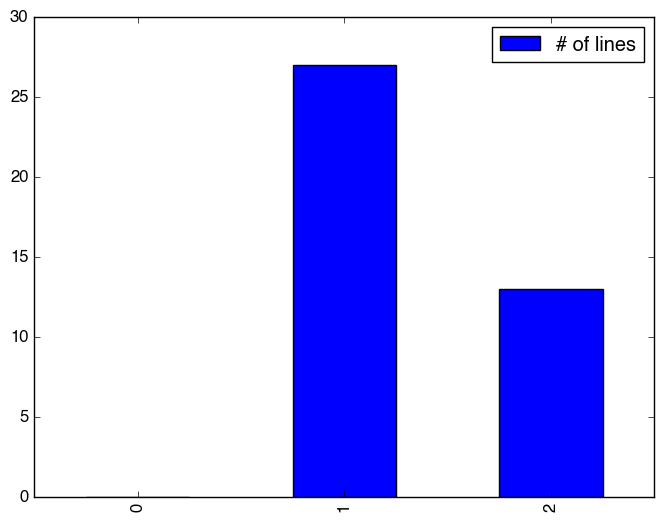

In [20]:
df.plot(kind='bar')

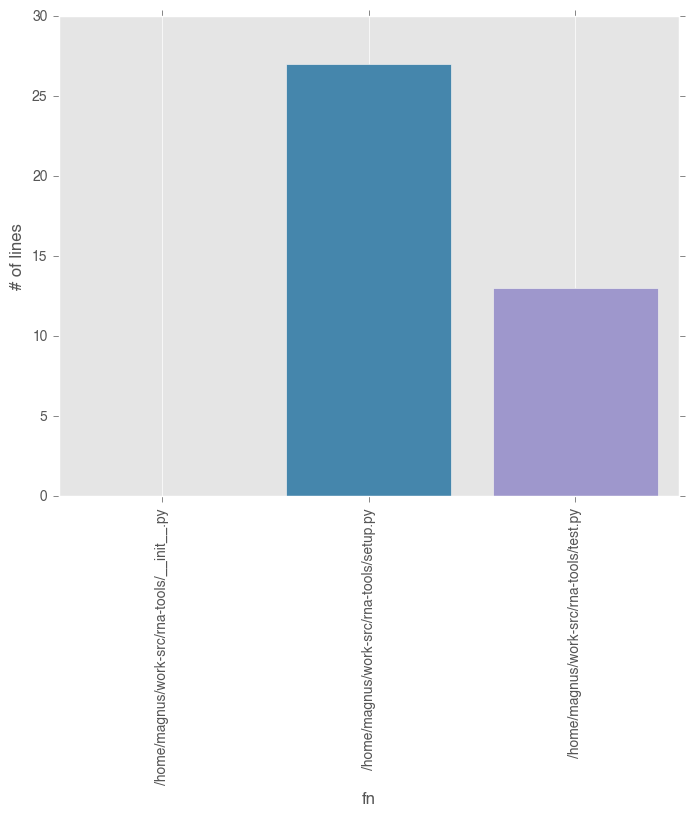

In [29]:
plt.figure(figsize=(4,4))
plt.style.use('ggplot')
ax = sns.barplot(data=df, x='fn', y="# of lines")
ax.grid()
plt.xticks(rotation=90);